# Sklearn Tutorial

This notebook was created durring the Spring semester of 2021 while doing research funded by XSEDE. 
This notebook in particular was a simplified and cleaned up version of our research source code that can be used as a template for learning the framework. We will also look into other python libraries like pandas, matplotlib and pickle 
### Goal:
In this notebook we will be using astronomical data from pulsars. The goal is to create a model that can accuratly predict if the data collected is from a pulsar or from Radio Frequency Interference (RFI). In machine learning, this is reffered to as a classification problem where we have input variables and need to group them into different classes. In this case, we have 2 classes: Pulsars and RFI.
<br>
Pictures of Pulsars:
<br>
<img src="notebook_data/pulsar_picture.jpg" style="height:200px">
<img src="notebook_data/pulsar_picture2.jpg" style="height:200px">

## Getting Current Working Directory
I've found that using local paths to files is a little buggy while using the pickles library. So, to aliviate the problem, we will use an absolute path by getting the current working directory and then joining that path to the local path when we load and save files. For more information on this you can read this article by [TutorialsPoint](https://www.tutorialspoint.com/python/os_getcwd.htm).

In [1]:
import os
here = os.getcwd()

## Pandas and the HTRU Dataset
Pandas is a Python library that provides helpful datastructures and functions to manipulate the data. The main structure is called a dataframe. The way we used this structure was basically a 2D array that holds our data. For more information on the Pandas library, check out [pandas documentation](https://pandas.pydata.org/docs/). It is also convention to import pandas as pd. This shorthand allows us to more quickly use pandas methods without having to type out 'pandas' every time we use it.
<br><br>
Now we need to load our dataset into a pandas dataframe. The dataset we will be using is the HTRU dataset. This is a clean dataset that has 8 input values and a class label for over 17,000 pieces of data. You can find and download the set [from Kaggle](https://www.kaggle.com/charitarth/pulsar-dataset-htru2). However, it is also provided in this repository saved as a csv file. The folks that created this open-source dataset requested any work that uses it provides the following citation: 
<br><br>
R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar
<br>	&emsp; Candidate Selection: From simple filters to a new principled real-time classification approach
<br>	&emsp; MNRAS, 2016.

<br>
For more information on the dataset, you can also check out the [more detailed citation](https://archive.ics.uci.edu/ml/datasets/HTRU2) I found on their website. This is also provided in this repository under htru_citation.txt.

In [2]:
import pandas as pd 

# pandas .read_csv() method saves a csv file into a pandas dataframe
data_frame = pd.read_csv(os.path.join(here, 'HTRU_2.csv'))

# .head() lets us look at the structure of the dataframe and the first 5 rows
data_frame.head() 

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


## Missing Column Headers
Notice that there are no column labels in the current dataframe. It bassically used the first piece of data as the column headers. We need to update the column headers with more useful headers. As described by the dataset creaters, the following are what each column corrisponds to:

<ol>
    <li>Mean of integrated profile</li>
	<li>Standard deviation of the integrated profile</li>
	<li>Excess kurtosis of the integrated profile</li>
	<li>Skewness of the integrated profile</li>
	<li>Mean of the DM-SNR curve</li>
	<li>Standard deviation of the DM-SNR curve</li>
	<li>Excess kurtosis of the DM-SNR curve</li>
	<li>Skewness of the DM-SNR curve</li>
	<li>Class</li>
</ol>
So, we will update the column headers of our data frame to better represent the above.

In [3]:
data_frame.columns =['Mean of Int. Prof.', 'Stand. Deviation of Int. Prof.', 
                     'Excess Kurtosis of Int. Prof.', 'Skewness of Int. Prof.',
                     'Mean of Curve', ' Stand. Deviation of Curve', 'Excess Kurtosis of Curve',
                     'Skewness of Curve', 'Class']

# Now that we added column headers lets look at the header
data_frame.head()

,Mean of Int. Prof.,Stand. Deviation of Int. Prof.,Excess Kurtosis of Int. Prof.,Skewness of Int. Prof.,Mean of Curve,Stand. Deviation of Curve,Excess Kurtosis of Curve,Skewness of Curve,Class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [3]:
# This looks much better! 

# Now, we need to make sure our dataset is clean so it can make a propper model
# We need to make sure that there are no duplicates and that there is no missing data
# Pandas has handy methods to help us check real quick

# First let's make sure there are no duplicates in our data
# Let's check the shape of the current dataframe
data_frame.shape

(17897, 9)

In [4]:
# This means there are 9 columns and 17,897 Columns
# Now let's drop all duplicate rows and see if the shape changes
data_frame.drop_duplicates()
data_frame.shape

(17897, 9)

In [5]:
# Same shape, that means there were no duplicate rows in the original dataset
# If you have a dataset with duplicates, after running drop_duplicates() 
# the dataframe will be smaller, but you can use the smaller dataframe to train your model

# Now, let's check if there are any fields with missing data

# the isnull() method indicates wheter or not values are missing
# .sum() counts the number of times in the dataframe that isnull() is true
# So basically this line of code counts the number of times there is missing data in our dataframe
data_frame.isnull().sum() 

Mean of Int. Prof.                0
Stand. Deviation of Int. Prof.    0
Excess Kurtosis of Int. Prof.     0
Skewness of Int. Prof.            0
Mean of Curve                     0
 Stand. Deviation of Curve        0
Excess Kurtosis of Curve          0
Skewness of Curve                 0
Class                             0
dtype: int64

Number of Non-Pulsars: 16258
Number of Pulsars:     1639
Ratio of Pulsars: 0.09157959434542103


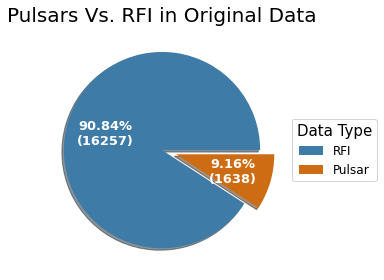

In [6]:
# There is no missing data in any of the columns. YAY!
# If you run into a dataset that does have missing data
# you can use the pandas method .dropnull() or dropna()

# Let's look at some other useful statistics on our data

# Let's see how many pulsars vs non-pulsars there are in the dataframe

# To break down what is done in these 2 lines
# data_frame[data_frame.Class == 0] returns
# a dataframe including all of the rows with a class 0
# len simply returns the length of such a dataframe

# a class of 0 is non pulsar and 1 is pulsar
print('Number of Non-Pulsars: ' + str(len(data_frame[data_frame.Class == 0])))
print('Number of Pulsars:     ' + str(len(data_frame[data_frame.Class == 1])))
print('Ratio of Pulsars: ' + str(1639/(16258+1639)))

# ORIGINAL DATA

import numpy as np
from matplotlib import pyplot as plt
import locale
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d})".format(pct, absolute)

pie_slices = [len(data_frame[data_frame.Class == 0]), len(data_frame[data_frame.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-bright")
color = ['#3e7ca7','#Ce6c14']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pie_slices, autopct=lambda pct: func(pct, pie_slices), textprops={ 'fontsize':13, 'color':"w"}, explode=explode, shadow=True, colors=color)

plt.setp(autotexts, **{'weight':'bold'})

leg = ax.legend(wedges, labels, loc='right', bbox_to_anchor=(1,0,.4,1), fontsize=12, frameon=True)

leg.set_title('Data Type', prop={'size':15})

ax.set_title("Pulsars Vs. RFI in Original Data", fontsize=20, color='k')

plt.tight_layout()

plt.show()

In [7]:
# There is an imbalance here. We need to be carefull that our model
# does not bias non_pulsars too much
# we will likely see more missed predictions of pulsars becasue of this

# Since we know our dataframe is clean data, we can now start splitting it
# up so we can start training Machine Learning Models off of it

# We need to separate our dataframe into input and output
# In our case, columns 1-8 are inputs and the output is the last column (Class)

# So, we need to put the first 8 columns into a dataframe and the last one into another dataframe
# There may be a better way to do this, but my approach was to make 2 copies of the dataframe
# and then drop the unwanted columns

# x will represent the input dataframe and y will represent the output dataframe

# axis 1 represents the columns (obviously axis 0 will represent the rows)
# inplace determines whether or not what is returned is a modified copy or 
# if the operation is done on the original dataframe
# since we want to save a modified copy we set inplace=False
x = data_frame.drop(['Class'], axis=1, inplace=False)

# Now let's do the same thing for the outputs
y = data_frame.drop(['Mean of Int. Prof.', 'Stand. Deviation of Int. Prof.', 
                     'Excess Kurtosis of Int. Prof.', 'Skewness of Int. Prof.',
                     'Mean of Curve', ' Stand. Deviation of Curve', 'Excess Kurtosis of Curve',
                     'Skewness of Curve'], axis=1, inplace=False)
# Let's look at the shape and see if they match our expectations
print(x.shape)
print(y.shape)

(17897, 8)
(17897, 1)


In [8]:
# Let's look at the heads to see what these operations did
x.head()

,Mean of Int. Prof.,Stand. Deviation of Int. Prof.,Excess Kurtosis of Int. Prof.,Skewness of Int. Prof.,Mean of Curve,Stand. Deviation of Curve,Excess Kurtosis of Curve,Skewness of Curve
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004


In [9]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [10]:
# As expected now x contains all of the inputs and y contains all of the outputs

# The next step is to separate our data into a training set and a testing set
# this way we can train our model and then test it on new data it hasn't seen

# sklearn has a really nice method that does this for us in 1 line
from sklearn.model_selection import train_test_split

# This method returns 4 datasets 2 inputs and 2 outputs
# The variable test_size determines what percentage of the dataframe
# is used for test. In this case we used 20% for testing
# which leaves 80% for training
# random_state is just the way that it shuffles data before splitting it up
# The documentation said 42 is common so that is the only reason I chose it

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Let's look at the size of the different dataframes to see what the function did
print((x_train.size)//8) # divide by 8 because there are 8 columns (// is integer division in python)
print(y_train.size)
print((x_test.size)//8) # divide by 8 because there are 8 columns
print(y_test.size)

14317
14317
3580
3580


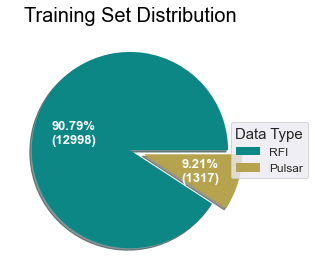

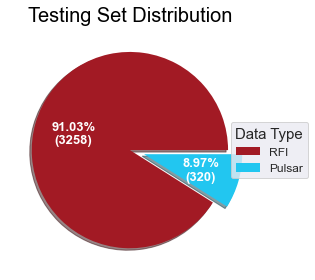

In [11]:

# THE FOLLOWING IS TO CREATE PIE CHARTS TO EASILY VISUALIZE DATA


# TRAINING PIE CHART

pie_slices = [len(y_train[y_train.Class == 0]), len(y_train[y_train.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-dark")
color =['#0d8686', '#B5a34e']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pie_slices, autopct=lambda pct: func(pct, pie_slices), textprops={ 'fontsize':13, 'color':"w"}, explode=explode, shadow=True, colors=color)

plt.setp(autotexts, **{'weight':'bold'})

leg = ax.legend(wedges, labels, loc='right', bbox_to_anchor=(1,0,.25,1), fontsize=12, frameon=True)

leg.set_title('Data Type', prop={'size':15})

ax.set_title("Training Set Distribution", fontsize=20, color='k')

plt.tight_layout()

plt.show()

# TESTING PIE CHART

pie_slices = [len(y_test[y_test.Class == 0]), len(y_test[y_test.Class == 1])]
labels = ['RFI', 'Pulsar']

explode = (0,0.15)


plt.style.use("seaborn-dark")
color =['#a21a24', '#22c6f0']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(pie_slices, autopct=lambda pct: func(pct, pie_slices), textprops={ 'fontsize':13, 'color':"w"}, explode=explode, shadow=True, colors=color)

plt.setp(autotexts, **{'weight':'bold'})

leg = ax.legend(wedges, labels, loc='right', bbox_to_anchor=(1,0,.25,1), fontsize=12, frameon=True)

leg.set_title('Data Type', prop={'size':15})

ax.set_title("Testing Set Distribution", fontsize=20, color='k')

plt.tight_layout()
plt.show()

In [12]:
# let's make sure the test and train sets contain a similar ratio of pulsars to non pulsars
non_pulsar_train = len(y_train[y_train.Class == 0])
pulsar_train = len(y_train[y_train.Class == 1])
percent_pusar_train = pulsar_train/(non_pulsar_train+pulsar_train)

non_pulsar_test = len(y_test[y_test.Class == 0])
pulsar_test = len(y_test[y_test.Class == 1])
percent_pusar_test = pulsar_test/(non_pulsar_test+pulsar_test)

print("TRAINING SET STATS:")
print('Number of Non-Pulsars=' + str(non_pulsar_train))
print('Number of Pulsars=' + str(pulsar_train))
print('Ratio of Pulsars=' + str(percent_pusar_train))
print('\nTESTING SET STATS:')
print('Number of Non-Pulsars=' + str(non_pulsar_test))
print('Number of Pulsars=' + str(pulsar_test))
print('Ratio of Pulsars=' + str(percent_pusar_test))

TRAINING SET STATS:
Number of Non-Pulsars=12999
Number of Pulsars=1318
Ratio of Pulsars=0.09205839212125445

TESTING SET STATS:
Number of Non-Pulsars=3259
Number of Pulsars=321
Ratio of Pulsars=0.08966480446927375


In [13]:
# Both have a good distribution very close to each other as well
# as the overall original's distribution

# Now that we have input and output can start training our models

# We will use models from the scikit learn library
# scikit learn also offers helpful metrics that will help us visualize the performance of our model

# acuracy score tells us the percentage of correct predictions our model made
from sklearn.metrics import accuracy_score

# Confusion matrix helps us visullize number of guesses that were right/wrong in each category
from sklearn.metrics import confusion_matrix

# f1 score summarizes the accuracy of true positives/ false positives/ true negatives/ false negatives
# basically a percentage version of the confusion matrix
from sklearn.metrics import f1_score

C:\Users\nnull\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Accuracy Score: 0.9787709497206704
F1 Score: [0.98838631 0.87662338]


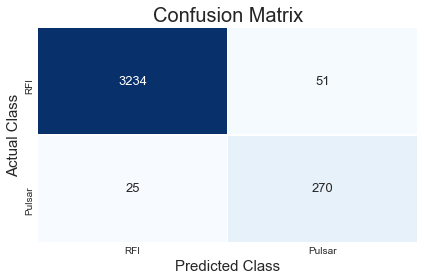

In [14]:
# there are a ton of different modles we can use from sklearn
# We will only focus on neural networks for this notebook
# The process is pretty much the same for all of them, you just have to 
# reference the online documentation to see what kinds of parameters are availible to you

# import the model from sklearn
# The documentation for MLPClassifier can be found here
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier

# create the model with whatever parameters you want to try
# for now I will just set the number and size of the hidden layers created
# If you want to mess with other parameters, reference the documentation
# This is 3 hidden layers of 10 hidden nodes each
neural_network = MLPClassifier(hidden_layer_sizes=(10,10,10))


# This line trains the model using the input and output of the training sets we separated before
neural_network.fit(x_train, y_train)

# This line uses the model we just created to predict the outputs of the test set
y_predict = neural_network.predict(x_test)
# redicted outputs and the actual outputs to see how our model did
# we will look at the performance with the sklearn metrics we imported before
print("Accuracy Score:", end = " ")
print(accuracy_score(y_test, y_predict))
print("F1 Score:", end =" ")
print(f1_score(y_test, y_predict, average=None))

import seaborn as sns
plt.title("Confusion Matrix", fontsize=20)

palette = sns.set_palette('pastel')

sns.heatmap(confusion_matrix(y_predict, y_test),cbar=False,annot=True, annot_kws={'size': 13}, fmt="d", linewidth=.5, robust=True, xticklabels=['RFI','Pulsar'], yticklabels=['RFI', 'Pulsar'], cmap='Blues', vmax = 3225, vmin = 19)

plt.xlabel('Predicted Class', fontsize=15)
plt.ylabel('Actual Class', fontsize=15)
plt.tight_layout()

In [15]:
# 97% accuracy is pretty good

# we can try other parameters to see if they do better
# It is almost impossible to try all combinations by hand
# there is a helpful method that lets us try different models 

# Grid search
from sklearn.model_selection import GridSearchCV

# Here we are comparing the 4 different values of activation and 3 different values for solver
# Gridsearch will compare all possible combinations of these and return the best
# The parameters are the model you want to use, a list of parameters you want to check, 
# cv and others you can look into
# cv=5 basically splits the test data into 5 different tests and then it takes the average to rank them
grid_search = GridSearchCV(MLPClassifier(hidden_layer_sizes=(10,10,10)),{
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
}, cv=5, return_train_score=False)

grid_search.fit(x_train, y_train)


s\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\nnull\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\nnull\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/

GridSearchCV(cv=5, estimator=MLPClassifier(hidden_layer_sizes=(10, 10, 10)),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [16]:
# Easier to look at results if you save them to a dataframe (so we can manipulate the data with pandas mehtods)
grid_search_results = pd.DataFrame(grid_search.cv_results_)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.596066,0.115624,0.002993,0.000894,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.981494,0.975209,0.980440,0.974502,0.977995,0.977928,0.002763,1
1,1.301678,1.364905,0.002821,0.000710,identity,sgd,"{'activation': 'identity', 'solver': 'sgd'}",0.973464,0.907821,0.974153,0.970311,0.972057,0.959561,0.025903,11
2,1.100885,0.148681,0.002769,0.000300,identity,adam,"{'activation': 'identity', 'solver': 'adam'}",0.978701,0.972067,0.974502,0.971708,0.977297,0.974855,0.002777,6
3,2.956254,0.393813,0.003860,0.000161,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.980447,0.971020,0.980440,0.974153,0.975201,0.976252,0.003689,2
4,0.644134,0.028657,0.003397,0.000349,logistic,sgd,"{'activation': 'logistic', 'solver': 'sgd'}",0.907821,0.907821,0.908138,0.908138,0.907789,0.907942,0.000161,12


In [17]:
# this gives us a bunch of helpful data
# We can sort based on the rank of the different tests so it is in order of best to worst combinations
# by tells us which column value we want to sort by
# axis tells us which we are sorting (we want to sort the rows)
# ascending is self explanitory
grid_search_results = grid_search_results.sort_values(by=['rank_test_score'], axis=0, ascending=True)
grid_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.596066,0.115624,0.002993,0.000894,identity,lbfgs,"{'activation': 'identity', 'solver': 'lbfgs'}",0.981494,0.975209,0.980440,0.974502,0.977995,0.977928,0.002763,1
3,2.956254,0.393813,0.003860,0.000161,logistic,lbfgs,"{'activation': 'logistic', 'solver': 'lbfgs'}",0.980447,0.971020,0.980440,0.974153,0.975201,0.976252,0.003689,2
5,3.814097,0.661056,0.003260,0.000395,logistic,adam,"{'activation': 'logistic', 'solver': 'adam'}",0.979399,0.974162,0.976947,0.974153,0.975899,0.976112,0.001959,3
11,3.236132,1.485711,0.002957,0.000633,relu,adam,"{'activation': 'relu', 'solver': 'adam'}",0.979399,0.973115,0.976249,0.975899,0.973454,0.975623,0.002268,4
9,2.527177,0.211673,0.003866,0.001566,relu,lbfgs,"{'activation': 'relu', 'solver': 'lbfgs'}",0.976257,0.973813,0.975550,0.974153,0.975201,0.974995,0.000900,5


In [18]:
# if you wanted to save this dataframe use the following
# you could use this to do further study on the results
grid_search_results.to_csv('tutorialGridSearch.csv', index=False)

In [19]:
# The last thing I want to look at in this tutorial is the library pickle
# This allows you to save trained models to your hard drive
# you can use this to save the best models that could be used for further use
import pickle

# this is just creating a file to write to and dumping the pickle
with open(os.path.join(here, 'tutorialGridsearch.pkl'), 'wb') as f:
    pickle.dump(neural_network, f)

In [20]:
# to load a pickle do the following
with open(os.path.join(here, 'tutorialGridsearch.pkl'), 'rb') as f:
    pickled_model = pickle.load(f)

In [21]:
# so directly from loading we can use it to predict again
y_predict = pickled_model.predict(x_test)

accuracy_score(y_test, y_predict)

0.9787709497206704